In [2]:
import oss2
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
with open("../aliyun_key.json" ,'r') as key:
    AccessKeyDict=json.loads(key.read())
AccessKeyId=AccessKeyDict["AccessKeyId"]
AccessKeySecret=AccessKeyDict["AccessKeySecret"]
auth = oss2.Auth(AccessKeyId, AccessKeySecret)
bucket = oss2.Bucket(auth, 'https://oss-cn-shanghai.aliyuncs.com', 'ocr-yjs')
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkcore.auth.credentials import AccessKeyCredential
from aliyunsdkcore.auth.credentials import StsTokenCredential
credentials = AccessKeyCredential(AccessKeyId, AccessKeySecret)
client = AcsClient(region_id='cn-shanghai', credential=credentials)

import seaborn as sns

In [62]:
"""

https://help.aliyun.com/document_detail/151896.html
通用文字识别
通用文字识别能力可以识别图像中文字内容和文字区域坐标，适用于多场景图像文字识别

"""



filepath="images/en1.jpg"
with open(filepath, 'rb') as fileobj:
    bucket.put_object(filepath, fileobj)
url="https://ocr-yjs.oss-cn-shanghai.aliyuncs.com/"+filepath

from aliyunsdkcore.request import CommonRequest


request = CommonRequest()
request.set_accept_format('json')
request.set_domain('ocr.cn-shanghai.aliyuncs.com')
request.set_method('POST')
request.set_protocol_type('https') # https | http
request.set_version('2019-12-30')
request.set_action_name('RecognizeCharacter')

request.add_query_param('OutputProbability', "true")
request.add_query_param('MinHeight', "5")
request.add_query_param('ImageURL', url)

response = client.do_action(request)
# python2:  print(response) 
response=json.loads(str(response, encoding='utf-8'))
print(response)

{'RequestId': 'AEC4FFF7-915B-51E0-9F15-D66F6DDF87AA', 'Data': {'Results': [{'TextRectangles': {'Left': 32, 'Top': 16, 'Angle': 0, 'Height': 22, 'Width': 718}, 'Probability': 0.99, 'Text': '"It is in writing that， unless they give themselves in， the Taliban will arrest and'}, {'TextRectangles': {'Left': 33, 'Top': 44, 'Angle': 0, 'Height': 18, 'Width': 642}, 'Probability': 0.99, 'Text': 'prosecute， interrogate and punish family members on behalf of those'}, {'TextRectangles': {'Left': 33, 'Top': 71, 'Angle': 0, 'Height': 16, 'Width': 116}, 'Probability': 0.99, 'Text': 'individuals."'}, {'TextRectangles': {'Left': 33, 'Top': 117, 'Angle': 0, 'Height': 19, 'Width': 690}, 'Probability': 0.99, 'Text': "He warned that anyone on the Taliban's blacklist was in severe danger， and"}, {'TextRectangles': {'Left': 32, 'Top': 144, 'Angle': 0, 'Height': 19, 'Width': 345}, 'Probability': 0.99, 'Text': 'that there could be mass executions.'}, {'TextRectangles': {'Left': 34, 'Top': 192, 'Angle': 0, 'Hei

In [63]:
Results=response["Data"]["Results"]
Results

[{'TextRectangles': {'Left': 32,
   'Top': 16,
   'Angle': 0,
   'Height': 22,
   'Width': 718},
  'Probability': 0.99,
  'Text': '"It is in writing that， unless they give themselves in， the Taliban will arrest and'},
 {'TextRectangles': {'Left': 33,
   'Top': 44,
   'Angle': 0,
   'Height': 18,
   'Width': 642},
  'Probability': 0.99,
  'Text': 'prosecute， interrogate and punish family members on behalf of those'},
 {'TextRectangles': {'Left': 33,
   'Top': 71,
   'Angle': 0,
   'Height': 16,
   'Width': 116},
  'Probability': 0.99,
  'Text': 'individuals."'},
 {'TextRectangles': {'Left': 33,
   'Top': 117,
   'Angle': 0,
   'Height': 19,
   'Width': 690},
  'Probability': 0.99,
  'Text': "He warned that anyone on the Taliban's blacklist was in severe danger， and"},
 {'TextRectangles': {'Left': 32,
   'Top': 144,
   'Angle': 0,
   'Height': 19,
   'Width': 345},
  'Probability': 0.99,
  'Text': 'that there could be mass executions.'},
 {'TextRectangles': {'Left': 34,
   'Top': 192,
  

In [64]:
TextList=[text["Text"] for text in Results]
''.join(TextList)

'"It is in writing that， unless they give themselves in， the Taliban will arrest andprosecute， interrogate and punish family members on behalf of thoseindividuals."He warned that anyone on the Taliban\'s blacklist was in severe danger， andthat there could be mass executions.Foreign powers are continuing efforts to get their nationals out ofAfghanistan.AN a to official said on Friday that more than 18， 000 people havebeen evacuated in the last five days from Kabul airport.Some 6， 000 more， among them former interpreters for foreign armed forces，are on standby to be flown out late on Thursday or early Friday.The aim is to double evacuation efforts over the weekend， the official said.'

In [65]:
Results[0]['TextRectangles']

{'Left': 32, 'Top': 16, 'Angle': 0, 'Height': 22, 'Width': 718}

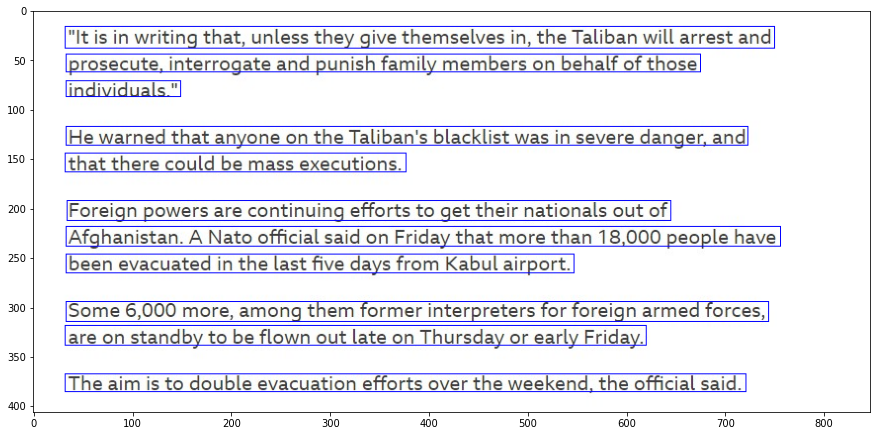

In [66]:
plt.figure(figsize=(15,10))
res=plt.imread(filepath)
for data in Results:
    Top=data['TextRectangles']["Top"]
    Left=data['TextRectangles']["Left"]
    Height=data['TextRectangles']["Height"]
    Width=data['TextRectangles']["Width"]
    Angle=data['TextRectangles']["Angle"]
    if Angle>=-25:
        res=cv2.rectangle(res,(Left,Top),(Left+Width,Top+Height),(0,0,255),1)
    else:
        res=cv2.rectangle(res,(Left,Top),(Left+Height,Top+Width),(0,0,255),1)
plt.imshow(res)

In [67]:
from PIL import Image
img=Image.fromarray(res)
img.save("images/en1_result.jpg")